<a href="https://colab.research.google.com/github/KangSukW00/class-project/blob/main/Steam_Gaming_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

<img src = "https://drive.google.com/uc?id=14iXNedBvnAQwcfYnQB2qcTZcSCe3PQDj" >

게임 산업은 근년 엄청난 성장을 보였으며, 2023년까지 게임 수익이 전 세계적으로 2,000억 달러 이상에 이르었다. PC 기반 게임의 가장 큰 유통업체 중 하나로서, STEAM by Valve Corportaion은 이 시장의 상당한 점유율을 차지하고 있다. STEAM 에서 이용 가능한 엄청난 수의 게임에 대한 데이터 분석을 통해 STEAM에서 성공적인 게임의 속성을 탐색해봄으로써 진화하는 게임 시장의 제품과 경험을 구성하는 새로운 시각을 얻을 수 있을 것이다. 특히 STEAM의 인기 장르, 가격 책정, 리뷰 점수, 출시 시기 등을 분석하면 소비자의 취향에 따라 게임 디자인과 마케팅을 설계하는 데 도움이 될 것이다. 이번 프로젝트를 통해 얻는 데이터 기반 통찰력은 자본주의 경쟁 사회에서 앞서가기 위해 중요한 도구로 쓰일 것으로 기대된다.

이번 프로젝트는 실제 스팀 데이터를 사용하여 데이터 기반 의사 결정을 뒷받침하는 것이 궁극적인 목표이고, 더불어 Google Corab과 Jupyter Notebook 활용, 데이터 분석 능력을 향상시키는 것이 개인적인 목표이다.



---



**Kaggle에서 데이터셋 파일 추가하기**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!ls -1ha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d nikdavis/steam-store-games

Dataset URL: https://www.kaggle.com/datasets/nikdavis/steam-store-games
License(s): Attribution 4.0 International (CC BY 4.0)
 91% 32.0M/35.2M [00:01<00:00, 30.2MB/s]
100% 35.2M/35.2M [00:01<00:00, 29.0MB/s]


In [4]:
!ls

sample_data  steam-store-games.zip


In [5]:
!unzip steam-store-games.zip

Archive:  steam-store-games.zip
  inflating: steam.csv               
  inflating: steam_description_data.csv  
  inflating: steam_media_data.csv    
  inflating: steam_requirements_data.csv  
  inflating: steam_support_info.csv  
  inflating: steamspy_tag_data.csv   


# **전처리**

## 라이브러리와 데이터셋 가져오기

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

steam_df = pd.read_csv('/content/steam.csv')
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


데이터셋을 살펴보면 많은 열에 1개 이상의 값(플랫폼, 카테고리, 장르, steamspy_tags, 소유자)이 포함되어 있다. 데이터를 분석하기 전에 각 열에 1개의 값만 포함되도록 여러 개의 다른 열로 분리해야 할것 같다.



**데이터 세트에 대한 정보 미리 보기**

In [7]:
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [8]:
steam_df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

## 중복 및 결측값 처리하기

In [9]:
steam_df.duplicated().sum()

0

In [10]:
steam_df.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

결측값이 존재하는 developer와 publisher는 이들을 필요로 하는 계산에서 NULL 처리를 할 것이다.

 **Owners 열의 중간값 계산 후 새로운 열을 만들어 중간값을 저장하기**

데이터셋을 살펴보면 값이 범위로 지정되어 있기 때문에 Owners 열에 대한 대표값을 도출하기 위해 소유권 하한과 상한 사이의 중간점을 계산했다. 이 중간점은 기존의 Owners의 보다 균형 잡힌 추정치를 제공하며, 이를 후속 계산에 사용할 것이다.

In [11]:
def calculate_middle_owner(owners_str):
    lower, upper = map(int, owners_str.split("-"))
    return (upper - lower) / 2

steam_df['middle_owners'] = steam_df['owners'].apply(calculate_middle_owner)

# **데이터 분석**

## **Ratings와 Owners의 상관 관계가 있을까?**

긍정 평가와 부정 평가의 수는 게임의 플레이어 기반에 의해 영향을 받아 데이터에 편향을 일으킬 수 있다. 이를 탐색하기 위해 데이터를 표준화한 다음 히트맵을 사용하여 이 변수들 간의 상관 관계를 파악해 보았다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

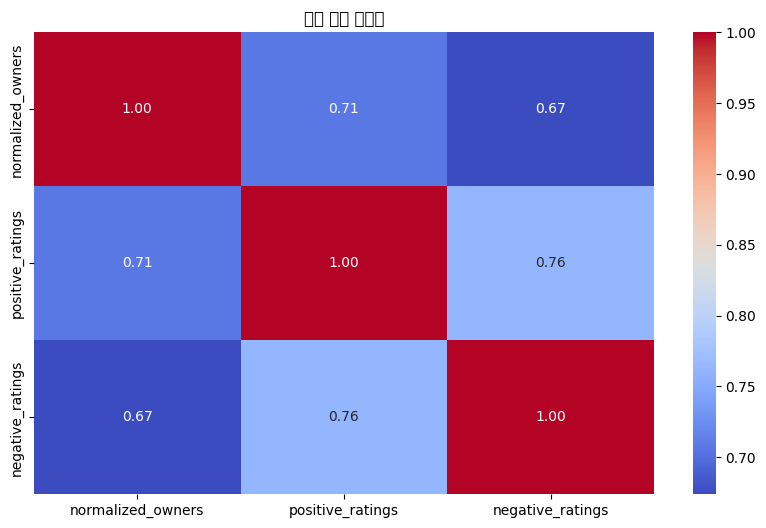

In [29]:
from sklearn.preprocessing import StandardScaler
# 'middle_owners' 열을 StandardScaler를 사용하여 정규화
scaler = StandardScaler()
steam_df['normalized_owners'] = scaler.fit_transform(steam_df['middle_owners'].values.reshape(-1, 1))

# 상관 행렬
correlation_matrix = steam_df[['normalized_owners', 'positive_ratings', 'negative_ratings']].corr()

# 상관 관계를 시각화하기 위한 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관 행렬 히트맵')
plt.show()

Steam Game Dataset을 분석한 결과, Owners(정규화)와 긍정적, 부정적 Ratings 간에는 약간의 상관관계가 발견되었으며, 이는 Owners가 더 많은 게임일수록 시청률이 약간 더 높은 경향이 있음을 시사한다. 그러나 이러한 결과치 상관관계가 인과관계를 의미하지는 않으며, 다른 요인에 의해 영향을 받을 가능성이 높다는 점을 예상해 볼 수 있다. Owners와 Ratings 간에는 유의미한 인과관계가 성립할 만큼 그 관계가 강하지 않다. 게임 산업의 Ratings 역학 관계는 Owners를 넘어서 여러 가지 복합적인 요인에 의해 영향을 받을 가능성이 높기 때문에, 좀 더 심층적인 분석과 다른 변수에 대한 고려가 필요하다.

## **STEAM 내 게임 가격의 변화는 어떠했을까?**

    year  price
0   1997  $5.99
1   1998  $7.19
2   1999  $3.99
3   2000  $5.59
4   2001   $2.0
5   2002  $7.99
6   2003  $2.99
7   2004  $5.76
8   2005  $4.03
9   2006  $7.56
10  2007  $5.63
11  2008  $6.54
12  2009  $6.99
13  2010  $7.39
14  2011  $7.53
15  2012  $8.59
16  2013  $8.69
17  2014  $7.47
18  2015  $6.42
19  2016  $5.89
20  2017  $5.89
21  2018  $5.57
22  2019  $6.19


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func

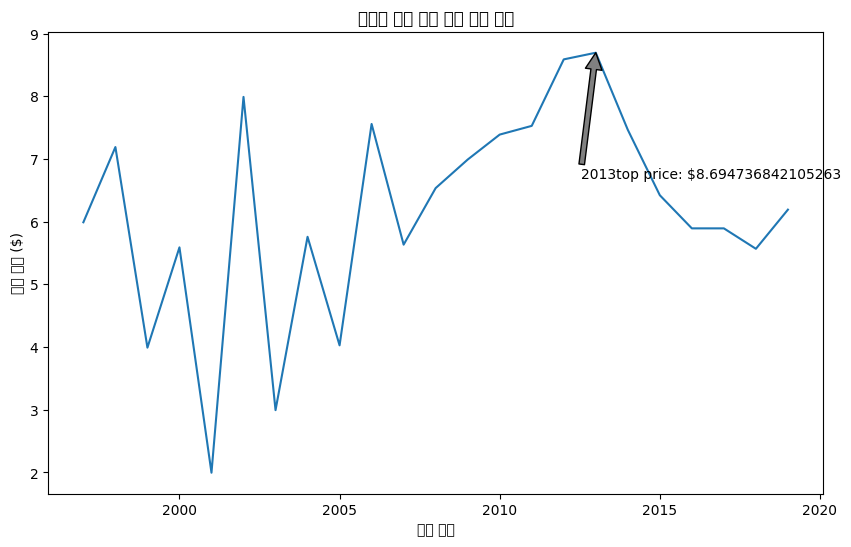

In [28]:
# release_date를 datetime으로 변환하고 year 열 추가
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['year'] = steam_df['release_date'].dt.year

# 연도별로 그룹화하여 평균 가격 계산
price_by_year = steam_df.groupby('year')['price'].mean().reset_index()

# 시간에 따른 평균 가격 선 그래프 생성
plt.figure(figsize=(10,6))
sns.lineplot(data=price_by_year, x='year', y='price')

plt.xlabel('출시 연도')
plt.ylabel('평균 가격 ($)')
plt.title('시간에 따른 스팀 게임 평균 가격')

# 플롯에 최고 가격 주석 달기
max_price_year = price_by_year['year'].iloc[price_by_year['price'].astype(float).idxmax()]
max_price = price_by_year['price'].astype(float).max()

plt.annotate(f'{max_price_year} top price: ${max_price}',

xy=(max_price_year, price_by_year['price'].astype(float).max()),
xytext=(max_price_year-0.45, price_by_year['price'].astype(float).max()-2),
arrowprops=dict(facecolor='grey'))

# 데이터 포맷팅 및 연도별 평균 출력
price_by_year['price'] = price_by_year['price'].apply(lambda x: '$'+str(round(x,2)))
print(price_by_year)

2001년 까지 게임 가격은 지속적으로 하락하는 추세를 보였는데, 2001년 이후에는 변동이 있지만 전체적으로 우상향을 하기 시작했다. 2000년대 초반 부터 게임 시장이 활발해졌음을 알 수 있다. 이 시기에는 < GTA3 >, < Battlefield 1942>, < Call of Duty >등이 출시되었다. 이 시기 우리나라의 게임 산업을 살펴보면 2001년은 한국 온라인 게임의 성장을 이끈 양대 요소인 부분유료화 요금체계와 온라인 게임 퍼블리싱 사업이 시작된 해이고 <카트라이더>,<서든어택>, <리니지 2> 등이 출시되기 시작했다. 역동적인 게임 산업에서 경쟁력을 유지하는 데 있어 게임 산업의 이러한 역사적 경향을 고려해 보면 좋을것 같다.

In [14]:
# release_date값을 datetime으로 변환
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])

# 2001년~2005년에 출시한 게임 필터링
filtered_df = steam_df[steam_df['release_date'].between('2001-01-01', '2005-12-31')]

#출시 순으로 정렬
filtered_df.sort_values(by=['release_date'], inplace=True)

# 데이터값 출력
print(filtered_df[['name', 'genres', 'release_date']])

                                                 name  \
988                                          Gothic 1   
3                                  Deathmatch Classic   
8                               Half-Life: Blue Shift   
1185                                      Geneforge 1   
778                                             Mafia   
2                                       Day of Defeat   
1186                                      Geneforge 2   
2143                               Chicken Shoot Gold   
7                      Counter-Strike: Condition Zero   
331   Unreal Tournament 2004: Editor's Choice Edition   
11                                  Half-Life: Source   
10                             Counter-Strike: Source   
13                            Half-Life 2: Deathmatch   
9                                         Half-Life 2   
1187                                      Geneforge 3   
117                              Sid Meier's Pirates!   
30                             

<ipython-input-14-bc4bbd8bc669>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by=['release_date'], inplace=True)


## **긍정적인 평가를 가장 많이 받는 출판사는 어디일까?**

출판사별 유저들의 평가를 분석했다.

                                               publisher  positive_ratings
8754                                    PUBG Corporation     496184.000000
10815                              Smartly Dressed Games     292574.000000
9405                                       Psyonix, Inc.     242561.000000
3208                                    Digital Extremes     226541.000000
12624                                              Valve     175689.066667
11312                                    Studio Wildcard     145035.000000
9690                                            Re-Logic     128107.000000
11062  Square Enix;Feral interactive (Mac);Feral Inte...     118634.000000
2474                                        ConcernedApe     118217.000000
3718                                  Endnight Games Ltd     110460.000000


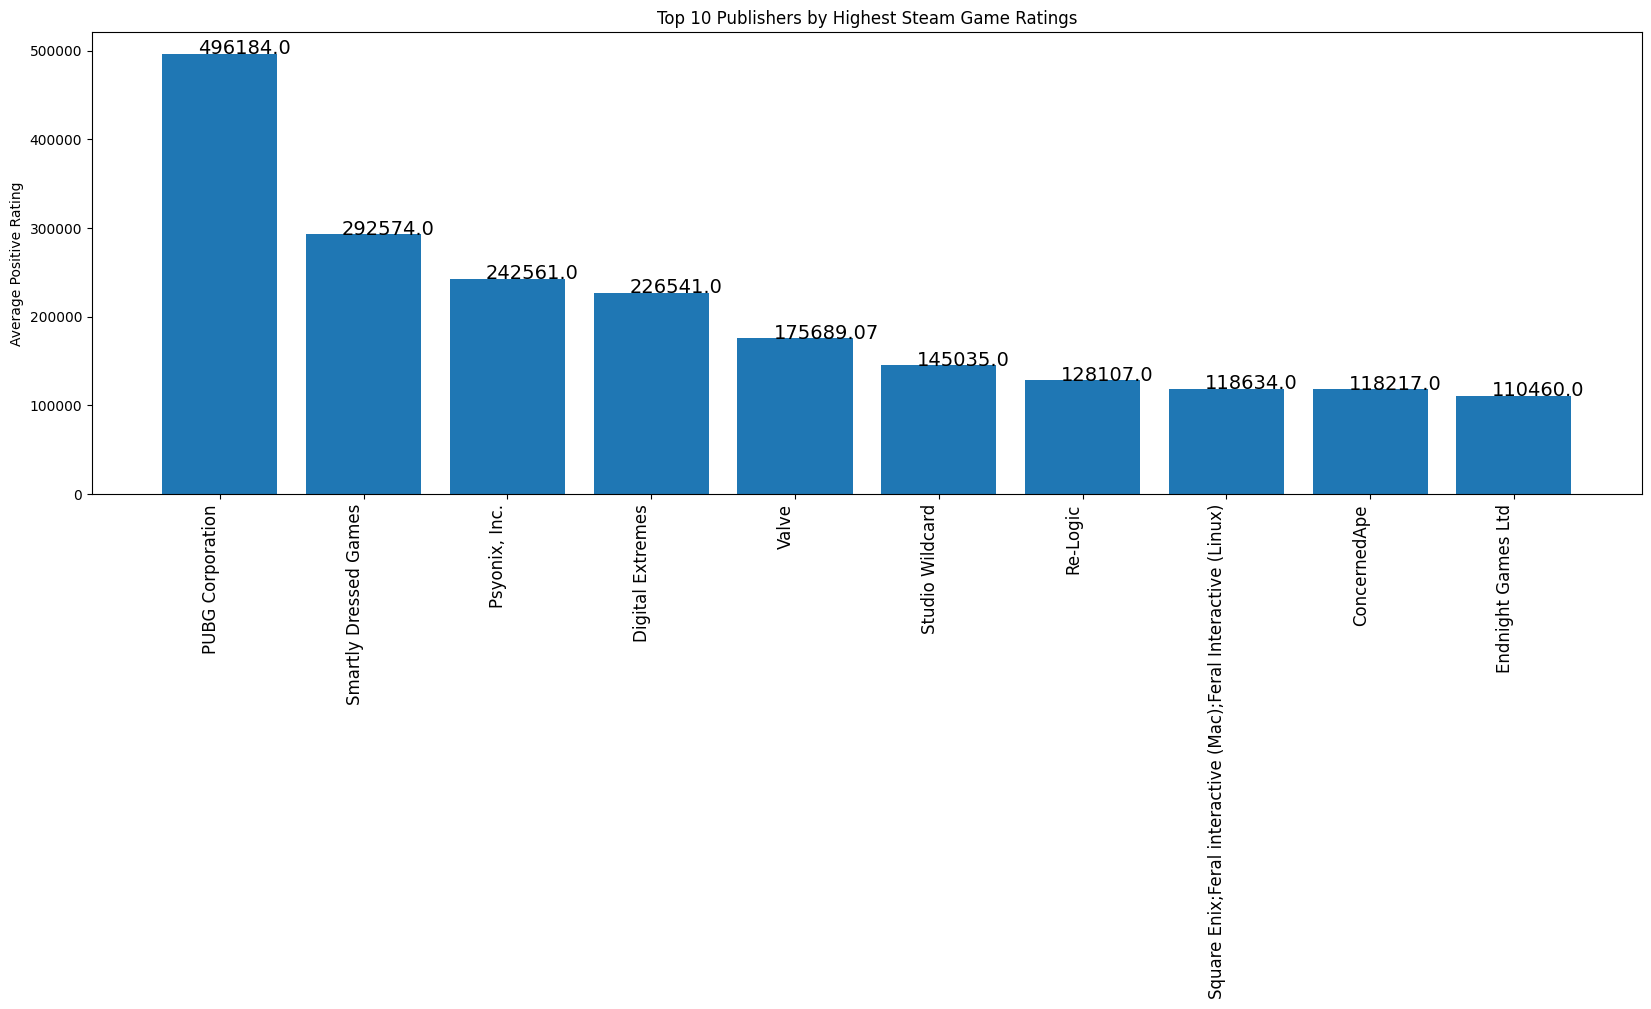

In [15]:
steam_df = steam_df[steam_df['publisher'].notnull()]

# 출판사별로 그룹화하고 평균 평점을 계산
publisher_ratings = steam_df.groupby('publisher')['positive_ratings'].mean().reset_index()

# 가장 높은 평균 평점으로 정렬
publisher_ratings = publisher_ratings.sort_values('positive_ratings', ascending=False)

# 평균 평점으로 상위 10개 출판사 출력
print(publisher_ratings.head(10))

# 막대 그래프 표현
plt.figure(figsize=(20, 6))

ax = plt.subplot()
ax.bar(publisher_ratings['publisher'].head(10), publisher_ratings['positive_ratings'].head(10))
ax.set_ylabel('Average Positive Rating')
ax.set_title('Top 10 Publishers by Highest Steam Game Ratings')

# 막대에 라벨 추가
for i, v in enumerate(publisher_ratings['positive_ratings'].head(10)):
    ax.text(i - 0.15, v + 0.25, str(round(v, 2)), fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)
plt.show()

상위 배급사들 중에서, PUBG Corporation, Smartly Dressed Games, 그리고 Psyonix, Inc.가 Steam에서 가장 높은 긍정적인 평가를 받았다.

## **리뷰 점수는 장르별로 다를까?**

다양한 게임 장르의 평균 리뷰 점수를 비교해보았다.

                    genre  positive_ratings
0              Accounting          7.000000
1                  Action       1661.722178
2               Adventure        441.714884
3    Animation & Modeling       1341.863636
4        Audio Production         47.750000
5                  Casual        208.231755
6   Design & Illustration        298.107143
7            Early Access         43.444444
8               Education         37.428571
9            Free to Play        791.263291
10                   Gore        127.000000
11                  Indie        728.763158
12  Massively Multiplayer       3067.000000
13                 Nudity        877.633929
14          Photo Editing         17.000000
15                    RPG       2611.759214
16                 Racing        988.548223
17         Sexual Content        571.975510
18             Simulation        845.717460
19      Software Training        138.000000
20                 Sports        180.180723
21               Strategy       

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-

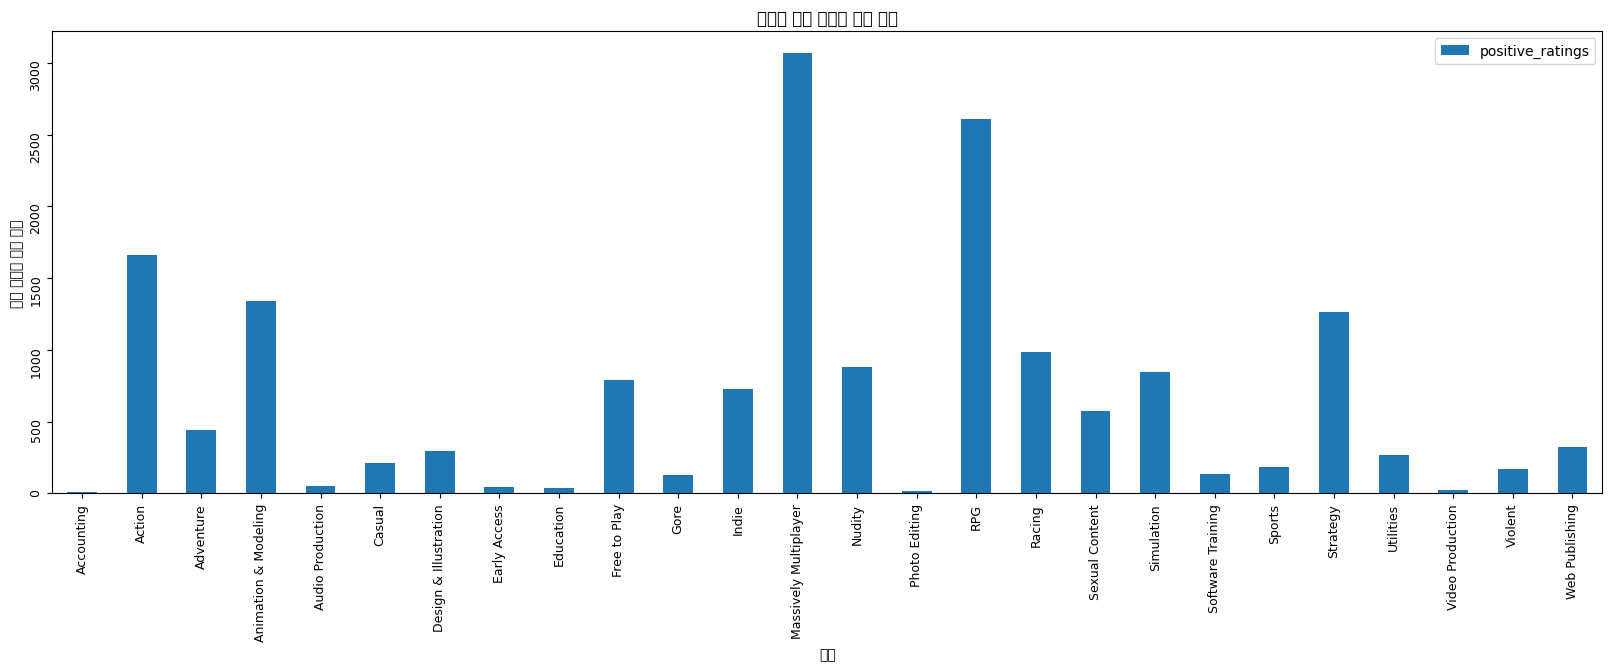

In [26]:
# 장르 목록에서 첫 번째 장르를 추출하여 'genre' 열 생성
steam_df['genre'] = steam_df['genres'].apply(lambda x: x.split(';')[0])

# 각 장르별 평균 긍정적 평가 점수 계산
genre_scores = steam_df.groupby('genre')['positive_ratings'].mean().reset_index()
print(genre_scores)

# 그림 크기 조정
plt.figure(figsize=(20, 6))

# 축을 명시적으로 생성
ax = plt.gca()

# 장르별 평균 긍정적 평가 점수의 막대 그래프
genre_scores.plot.bar(x='genre', y='positive_ratings', rot=0, title="장르별 평균 긍정적 평가 점수", ax=ax)

# 축의 라벨 크기와 회전 조정
ax.tick_params(rotation=90, labelsize=9)
ax.set_xlabel("장르")
ax.set_ylabel("평균 긍정적 평가 점수")

# 그래프 표시
plt.show()

스팀에 대한 리뷰 점수는 실제로 장르에 따라 달랐다. "Massively Multiplayer," "RPG," "Simulation"과 같은 특정 장르의 게임은 평균적으로 더 높은 긍정적인 평가를 받는 경향이 있다. 이 정보는 사용자의 만족도를 높이기 위한 장르별 전략과 콘텐츠 개발의 중요성을 강조하기 때문에 게임 사업에 유용합니다.

## **특정 태그나 설명어가 있는 게임이 더 인기 있는 경향이 있을까?**

태그와 사용자 등급/소유자 수 간의 상관관계를 분석해보았다.

<ipython-input-24-d491ca358697>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_positive_per_owner', y='tag', data=top_10_tags, ax=axes[0], palette='viridis')
<ipython-input-24-d491ca358697>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='middle_owners', y='tag', data=top_10_owners, ax=axes[1], palette='magma')


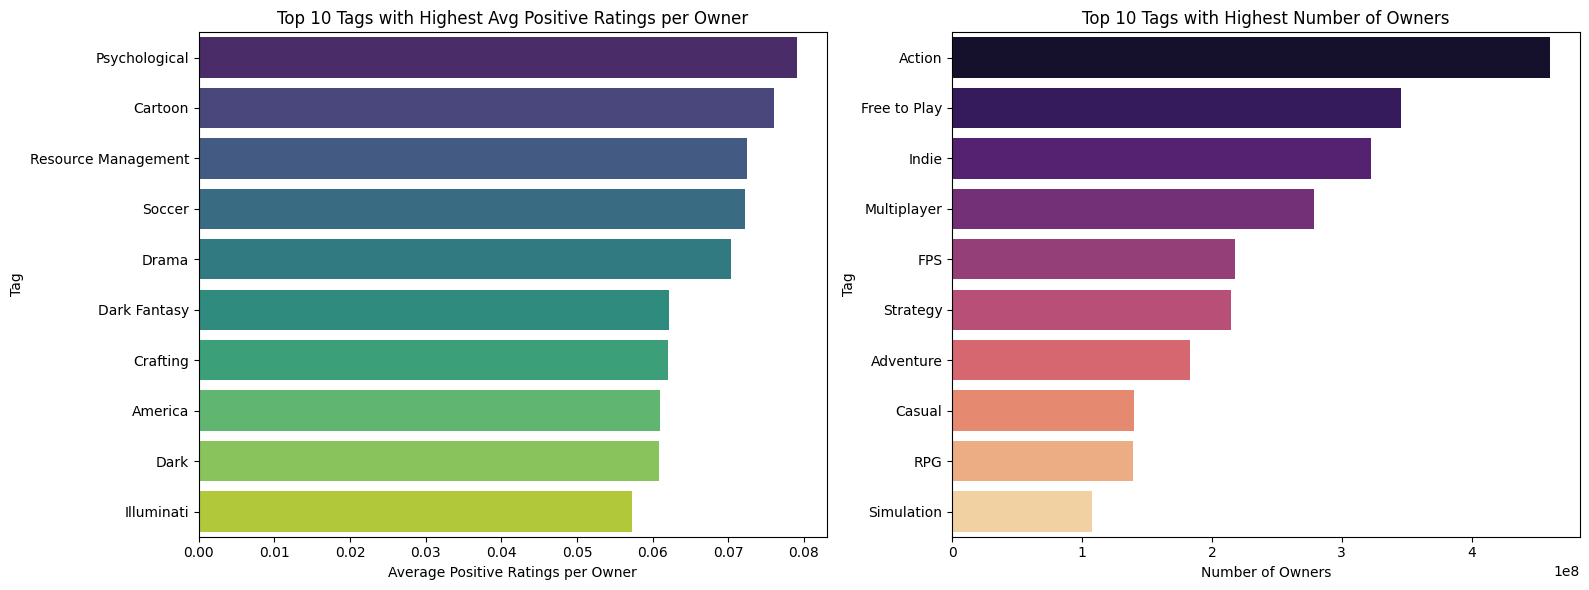

In [24]:
# 'middle_owners' 열이 존재하는지 확인
if 'middle_owners' in steam_df.columns:
    # 'steamspy_tags' 열을 개별 태그로 분할
    steam_df['tags'] = steam_df['steamspy_tags'].str.split(';')

    # 모든 유일한 태그 목록 생성
    all_tags = set(tag for tags in steam_df['tags'] for tag in tags)

    # 각 태그의 긍정적인 평가 합계와 소유자 수 합계를 저장할 사전 생성
    tag_stats = {}

    # 각 태그의 긍정적인 평가 합계와 소유자 수 합계를 계산
    for tag in all_tags:
        tag_stats[tag] = {
            'positive_ratings': steam_df[steam_df['tags'].apply(lambda x: tag in x)]['positive_ratings'].sum(),
            'middle_owners': steam_df[steam_df['tags'].apply(lambda x: tag in x)]['middle_owners'].fillna(0).sum()
        }

    # 태그 통계에서 데이터프레임 생성
    tag_stats_df = pd.DataFrame.from_dict(tag_stats, orient='index').reset_index()
    tag_stats_df = tag_stats_df.rename(columns={'index': 'tag'})

    # 각 태그에 대한 평균 긍정 평가 수 계산
    tag_stats_df['average_positive_per_owner'] = tag_stats_df['positive_ratings'] / tag_stats_df['middle_owners']

    # 평균 긍정 평가 수가 가장 높은 상위 10개 태그 선택
    top_10_tags = tag_stats_df.nlargest(10, 'average_positive_per_owner')

    # 소유자 수가 가장 많은 상위 10개 태그 선택
    top_10_owners = tag_stats_df.nlargest(10, 'middle_owners')

    # 하위 플롯 생성
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # 플롯 1: 평균 긍정 평가 수가 가장 높은 상위 10개 태그
    sns.barplot(x='average_positive_per_owner', y='tag', data=top_10_tags, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Tags with Highest Avg Positive Ratings per Owner')
    axes[0].set_xlabel('Average Positive Ratings per Owner')
    axes[0].set_ylabel('Tag')

    # 플롯 2: 소유자 수가 가장 많은 상위 10개 태그
    sns.barplot(x='middle_owners', y='tag', data=top_10_owners, ax=axes[1], palette='magma')
    axes[1].set_title('Top 10 Tags with Highest Number of Owners')
    axes[1].set_xlabel('Number of Owners')
    axes[1].set_ylabel('Tag')

    plt.tight_layout()
    plt.show()
else:
    print("The 'middle_owners' column does not exist in the dataset.")

## **게임 플레이 시간과 긍정적인 평가는  상관관계가 클까?**

먼저 평균 플레이 시간을 확인해보자.

<ipython-input-20-ab12c49e0bbd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df.average_playtime, kde=False, rug=False)


Text(0.5, 0, 'Average playtime')

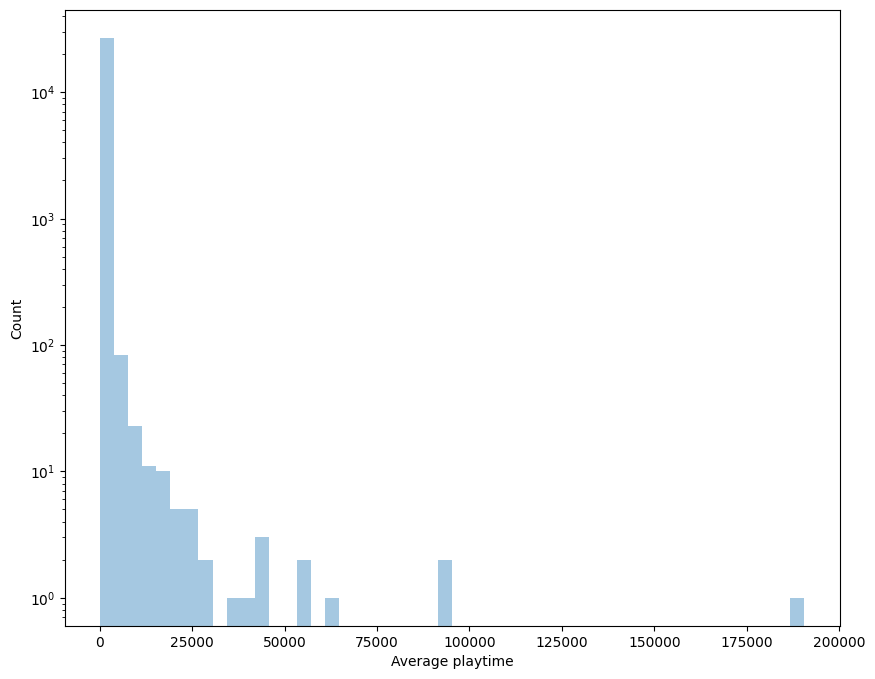

In [20]:
df = pd.read_csv('steam.csv')
plt.figure(figsize=(10,8))

g = sns.distplot(df.average_playtime, kde=False, rug=False)
g.set_yscale('log')

plt.ylabel("Count")
plt.xlabel("Average playtime")
# plt.xlim(0, 50000)

### *긍정적 평가와 평균 플레이 시간에 대한 선형 회귀 분석*

<ipython-input-21-20cd92ecd5ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['average_playtime_std'] = (data['average_playtime'] - data['average_playtime'].mean()) / data['average_playtime'].std()
<ipython-input-21-20cd92ecd5ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['positive_ratings_std'] = (data['positive_ratings'] - data['positive_ratings'].mean()) / data['positive_ratings'].std()


Correlation: 0.14643151718205724


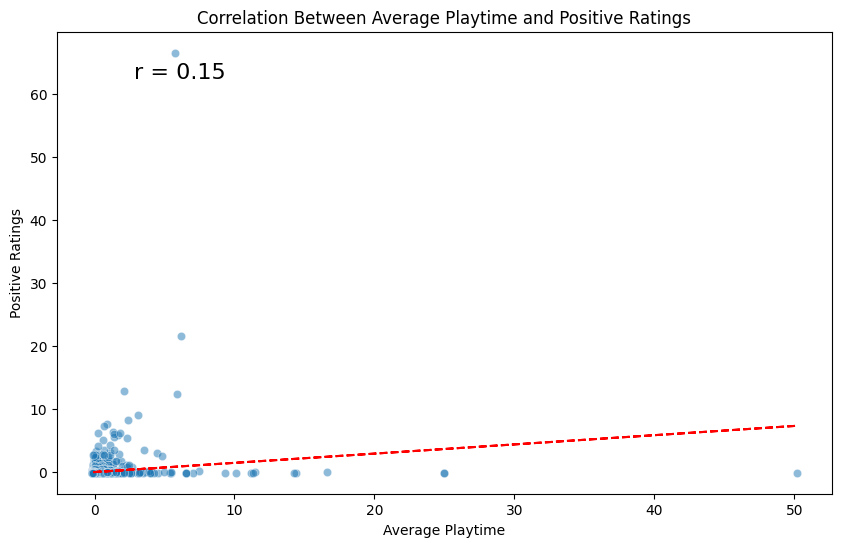

In [21]:
from scipy.stats import pearsonr

# 긍정적인 평가와 평균 플레이타임이 있는 게임 필터링
data = steam_df[(steam_df['positive_ratings'] > 0) & (steam_df['average_playtime'] > 0)]

# 열 표준화
data['average_playtime_std'] = (data['average_playtime'] - data['average_playtime'].mean()) / data['average_playtime'].std()
data['positive_ratings_std'] = (data['positive_ratings'] - data['positive_ratings'].mean()) / data['positive_ratings'].std()

# 피어슨 상관계수 계산
corr, p = pearsonr(data['average_playtime_std'], data['positive_ratings_std'])
print('Correlation:', corr)

# 산점도 생성
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='average_playtime_std', y='positive_ratings_std', alpha=0.5)

# 선형 회귀 계산
m, b = np.polyfit(data['average_playtime_std'], data['positive_ratings_std'], 1)

# 회귀선 추가
plt.plot(data['average_playtime_std'], m*data['average_playtime_std'] + b, color='red', linestyle='--')

# 상관계수 주석 추가
plt.annotate('r = {:.2f}'.format(corr), xy=(.1, .9), xycoords='axes fraction', fontsize=16)

# 축 라벨 지정
plt.xlabel('Average Playtime')
plt.ylabel('Positive Ratings')
plt.title('Correlation Between Average Playtime and Positive Ratings')

plt.show()

데이터 세트에서 표준화된 평균 플레이 시간과 게임의 표준화된 긍정적인 평점 사이에 의미 있는 선형 관계를 찾지 못했다.

### **가격과 긍정적인 평가의 상관관계**

회귀 계수 (기울기): 118.18913026448283
절편: 7.602257417400892


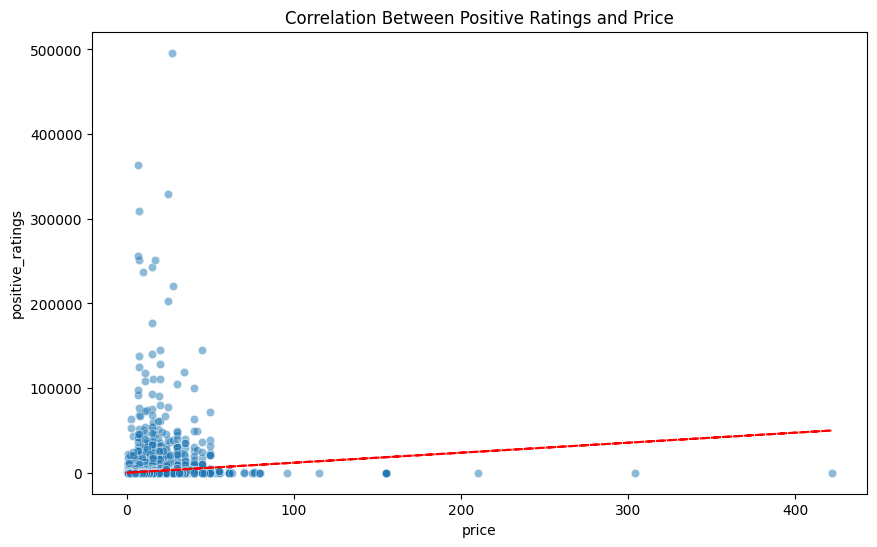

In [22]:

from sklearn.linear_model import LinearRegression
if 'price' in steam_df.columns and 'positive_ratings' in steam_df.columns:
    # 유효한 데이터만 필터링 (긍정적인 평가와 가격이 0보다 큰 경우)
    data = steam_df[(steam_df['positive_ratings'] > 0) & (steam_df['price'] > 0)]

    # 모델 학습
    X = data['price'].values.reshape(-1, 1)
    y = data['positive_ratings'].values
    model = LinearRegression()
    model.fit(X, y)

    # 회귀선 예측
    y_pred = model.predict(X)

    # 회귀 계수와 절편 출력
    print('회귀 계수 (기울기):', model.coef_[0])
    print('절편:', model.intercept_)

    # 산점도 및 회귀선 시각화
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='positive_ratings', data=data, alpha=0.5)
    plt.plot(data['price'], y_pred, color='red', linestyle='--')
    plt.xlabel('price')
    plt.ylabel('positive_ratings')
    plt.title('Correlation Between Positive Ratings and Price')
    plt.show()
else:
    print("'price'와 'positive_ratings' 열이 데이터셋에 존재하지 않습니다.")

### 가격과 플레이시간의 상관관계

상관계수: 0.21294325577906542
p-값: 7.554188598307886e-56


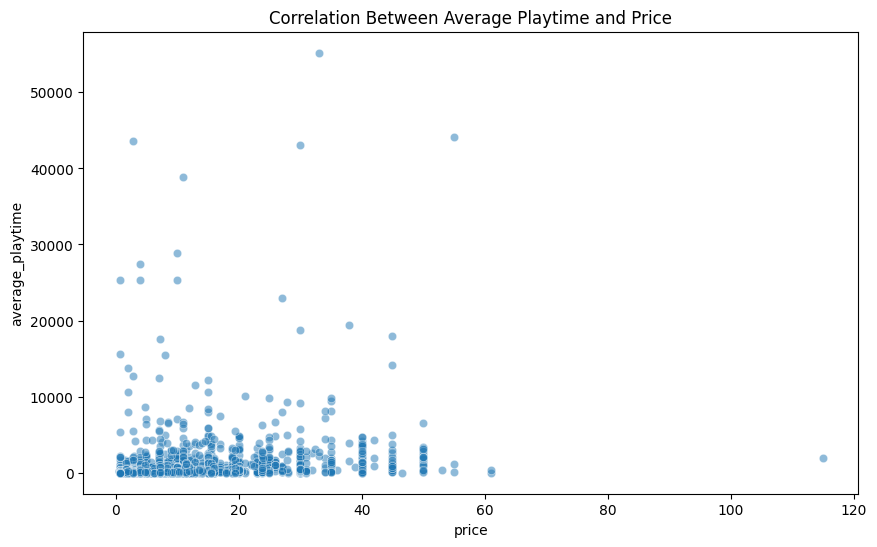

In [23]:
from scipy.stats import pearsonr

# 'price'와 'average_playtime' 열이 존재하는지 확인
if 'price' in steam_df.columns and 'average_playtime' in steam_df.columns:
    # 유효한 데이터만 필터링 (플레이 타임과 가격이 0보다 큰 경우)
    data = steam_df[(steam_df['average_playtime'] > 0) & (steam_df['price'] > 0)]

    # 피어슨 상관계수 계산
    corr, p = pearsonr(data['price'], data['average_playtime'])
    print('상관계수:', corr)
    print('p-값:', p)

    # 산점도 시각화
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='average_playtime', data=data, alpha=0.5)
    plt.xlabel('price')
    plt.ylabel('average_playtime')
    plt.title('Correlation Between Average Playtime and Price')
    plt.show()


특정 태그 또는 설명어가 있는 게임은 다양한 수준의 인기를 갖는 경향이 있음을 발견했다. 'Psychological', 'Cartoon', 'Resource Management'와 같은 태그는 소유자당 평균 긍정 평가가 더 높으며, 이는 이 태그가 사용자들 사이에서 게임 인기에 기여할 수 있음을 시사한다. 반면 'Action'과 'Free to Play'와 같은 일반 태그는 상당한 수의 긍정 평가를 가지지만 소유자당 평균 긍정 평가는 더 낮다.

## **Steam 게임에서 가장 많이 사용되는 운영체제는 무엇일까?**

Windows, Mac, Linux와 같은 운영체제의 사용 빈도를 살펴보았다.

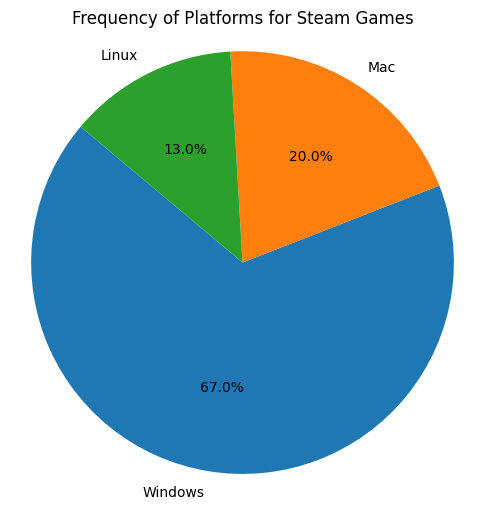

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 'platforms' 열을 개별 플랫폼으로 분할
steam_df['platforms'] = steam_df['platforms'].str.split(';')

# 모든 유일한 플랫폼 목록 생성
all_platforms = set(platform for platforms in steam_df['platforms'] for platform in platforms)

# 각 플랫폼의 빈도를 저장할 사전 생성
platform_counts = {}

# 각 플랫폼의 빈도를 계산
for platform in all_platforms:
    platform_counts[platform] = steam_df[steam_df['platforms'].apply(lambda x: platform in x)].shape[0]

# 플랫폼 빈도에서 데이터프레임 생성
platform_counts_df = pd.DataFrame.from_dict(platform_counts, orient='index', columns=['count']).reset_index()
platform_counts_df = platform_counts_df.rename(columns={'index': 'platform'})

# 플랫폼을 빈도 내림차순으로 정렬
platform_counts_df = platform_counts_df.sort_values(by='count', ascending=False)

# 각 플랫폼 레이블의 첫 글자를 대문자로 변환
platform_counts_df['platform'] = platform_counts_df['platform'].str.capitalize()

# 플랫폼 빈도를 시각화하기 위한 원형 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(platform_counts_df['count'], labels=platform_counts_df['platform'], autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Platforms for Steam Games')
plt.axis('equal')  # 원형이 원으로 그려지도록 동일한 종횡비 설정

plt.show()

 Windows가 27,000개 이상의 타이틀이 제공되는 가장 일반적인 Steam 게임 플랫폼임을 알 수 있다. Mac과 Linux가 각각 약 8,000개와 5,000개의 게임으로 그 뒤를 잇고 있다. 이는 Steam에서 Windows가 67%의 지배적인 위치를 차지하고 있기 때문에 게임을 개발하고 마케팅할 때 Windows 호환성을 우선적으로 고려하고 Mac과 Linux를 추가로 지원하는 것이 좋을것같다.

# Conclusion

이번 분석을 통해 얻은 결론을 바탕으로, Steam 플랫폼의 주요 동향을 요약하면 다음과 같다.



1. **플레이 타임과 사용자 평가의 관계:** Steam 게임 데이터 분석 결과, 평균 플레이 타임과 긍정적 평가 사이에 약한 양의 상관관계가 있는 것으로 나타났다. 이는 게임의 플레이 타임이 길수록 사용자로부터 긍정적인 평가를 받을 가능성이 있다는 점을 시사한다. 따라서 게임 개발자들은 게임의 플레이 타임을 늘려 사용자 만족도를 높이는 전략을 고려할 수 있다. 그러나 상관관계가 강하지 않기 때문에, 플레이 타임 외에도 게임의 품질과 콘텐츠가 중요한 영향을 미친다는 점을 염두에 두어야 한다.

2. **가격과 사용자 평가의 독립성:** 게임의 가격과 긍정적 평가 사이에는 유의미한 상관관계가 발견되지 않았다. 이는 게임의 가격이 사용자 평가에 직접적인 영향을 미치지 않는다는 점을 의미한다. 따라서 게임의 가격 전략은 사용자 평가와 독립적으로 설정할 수 있으며, 높은 품질의 게임을 합리적인 가격에 제공하는 것이 중요하다. 이는 또한 할인 행사나 번들 판매와 같은 가격 프로모션 전략이 사용자 평가에 큰 영향을 미치지 않을 수 있음을 시사한다.
3. **특정 태그의 인기:** 특정 태그별 분석 결과, "Indie"와 "Action" 태그가 높은 긍정적 평가를 받았다. 이는 이러한 태그가 포함된 게임이 사용자에게 인기가 많다는 것을 의미한다. 개발자들은 이러한 인기 태그를 고려하여 게임을 개발하고 마케팅 전략을 수립할 수 있다. 특히 인디 게임의 경우, 창의적이고 독특한 콘텐츠가 사용자에게 좋은 반응을 얻고 있다는 점에서, 작은 개발사들도 성공 가능성이 높다.
4. **운영체제별 사용자 선호도:**
운영체제별 분석 결과, Windows 플랫폼이 가장 많은 사용자와 긍정적 평가를 받았다. Mac과 Linux도 긍정적 평가를 받았으나, 사용자 수는 상대적으로 적었다. 이는 Windows가 여전히 주요 게임 플랫폼으로서의 위치를 유지하고 있음을 보여준다. 그러나 Mac과 Linux 사용자도 무시할 수 없는 수치이므로, 다중 플랫폼 지원이 가능하다면 이를 고려하는 것이 좋다.
5. **장르별 사용자 평가:**
장르별 분석 결과, "Action"과 "Adventure" 장르가 가장 많은 긍정적 평가와 소유자 수를 기록했다. 이는 이러한 장르가 사용자에게 매우 인기가 있다는 것을 의미한다. 게임 개발자들은 이러한 인기 장르를 고려하여 게임을 기획하고 개발할 수 있으며, 해당 장르의 시장 잠재력을 최대한 활용할 수 있다.